### SIFT:Scale-invariant feature transformScale-invariant feature transform 

**SIFT** les descripteurs fournissent une représentation alternative pour les régions d'image. Ils sont très utiles pour faire correspondre les images. Les détecteurs de coin simples fonctionnent bien lorsque les images à faire correspondre sont de nature similaire (en ce qui concerne l'échelle, l'orientation, etc.). Mais s'ils ont des échelles et des rotations différentes, les descripteurs SIFT doivent être utilisés pour les faire correspondre. SIFT est non seulement invariant à l'échelle, mais il obtient toujours de bons résultats lorsque la rotation, l'éclairage et les points de vue des images changent également.

### opencv et opencv-contrib

Afin de pouvoir utiliser les fonctions SIFT avec python-opencv, 
vous devez d'abord installer opencv-contrib en suivant les instructions de ce lien : 
https://pypi.org/project/opencv-contrib-python/.

### Exercice 

Détecter les points clés SIFT et les dessine à l'aide d'entrer de l'image **cloudy10.jpg**.
Vous allez d'abord construire un objet SIFT puis utiliser la méthode **detect()**
pour calculer les points clés d'une image. Chaque point clé est 
une caractéristique spéciale et possède plusieurs attributs. Par exemple, 
ses coordonnées (x, y), son angle (orientation), sa réponse (force des points clés),
la taille du voisinage significatif, ...

Vous utilisez la fonction **drawKeyPoints()** de **cv2** pour dessiner les petits cercles autour des points clés détectés. Si le **cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS** est appliqué à la fonction, elle dessinera un cercle avec la taille d'un point clé, ainsi que son orientation. Afin de calculer les points clés et le descripteur ensemble, vous allez utiliser la fonction **detectAndCompute()** .

### Création de descripteur d'image

* Cette image contient 319 descripteurs
* Chaque descripteur est un vecteur de longueur 128

**Etapes**
1. passage en gris 
2. equalisation en histogramme
3. création d'une liste de descripteurs d'image 
4. dessiner les points clés de l'image 
5. afficher les descripteurs

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

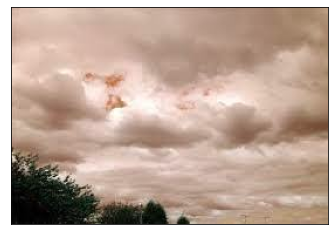

In [76]:
img = cv.imread('img/cours2/cloudy10.jpg')

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

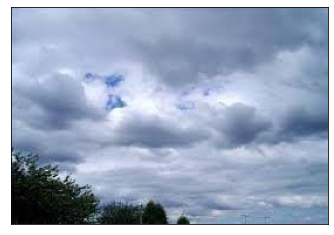

In [159]:
plt.imshow(plt.imread('img/cours2/cloudy10.jpg'))
plt.xticks([])
plt.yticks([])
plt.show()

## Etape 1 : Gray

In [133]:
#gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray= cv.imread('img/cours2/cloudy10.jpg',0)
cv.imwrite('img/cours2/cloud_gray.jpg',gray)

True

In [134]:
gray.shape

(186, 271)

## Etape 2 : Equalize

In [149]:
equ = cv.equalizeHist(gray)
cv.imwrite('img/cours2/cloud_equal.jpg',equ)

True

In [150]:
equ.shape

(186, 271)

## Etape 3 : liste descripteur

In [151]:
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)

In [152]:
print(f'Descripteurs :  {des.shape}')
print(des)

Descripteurs :  (104, 128)
[[ 2.  2. 20. ...  0.  0.  0.]
 [ 6. 15.  0. ...  1. 13. 18.]
 [22.  1.  0. ...  7.  3.  1.]
 ...
 [75. 20.  1. ...  8.  3.  3.]
 [17. 17.  4. ...  5.  1.  2.]
 [ 3.  0.  0. ...  0.  0.  4.]]


## Etape 4 : dessiner les keypoints

In [153]:
sift = cv.SIFT_create(300)
kp = sift.detect(equ,None)
img_kp =cv.drawKeypoints(equ,kp,img)
cv.imwrite('img/cours2/sift_keypoints.jpg',img_kp)

True

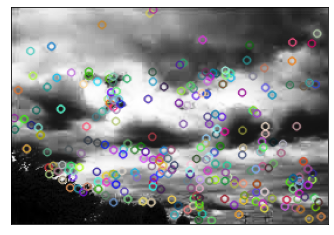

In [154]:
plt.imshow(img_kp)
plt.xticks([])
plt.yticks([])
plt.show()

## Etape 5: Afficher les descripteus

In [155]:
kp, des = sift.detectAndCompute(equ,None)

In [156]:
print(f'Descripteurs :  {des.shape}')
print(des)

Descripteurs :  (300, 128)
[[ 40.  21.  63. ...   1.   0.   0.]
 [ 46.   3.   0. ...   8.   1.   1.]
 [  1.   1.   0. ...  13.   1.   3.]
 ...
 [ 37. 117.   1. ...   0.   0.   0.]
 [  5.   4.  77. ...   8.   1.   0.]
 [ 29.   9.   1. ...  32.  16.  69.]]


In [4]:
def transform_kp(file):
    gray= cv.imread(file,0)
    equ = cv.equalizeHist(gray)
    sift = cv.SIFT_create(300)
    kp, des = sift.detectAndCompute(equ,None)
    img_kp =cv.drawKeypoints(equ,kp,gray)
    cv.imwrite('sift_keypoints.jpg',img_kp)
    print(f'Descripteurs :  {des.shape}')
    print(des)
    
transform_kp('img/cours2/cloudy10.jpg')

Descripteurs :  (300, 128)
[[ 40.  21.  63. ...   1.   0.   0.]
 [ 46.   3.   0. ...   8.   1.   1.]
 [  1.   1.   0. ...  13.   1.   3.]
 ...
 [ 37. 117.   1. ...   0.   0.   0.]
 [  5.   4.  77. ...   8.   1.   0.]
 [ 29.   9.   1. ...  32.  16.  69.]]


## Rendu final à avoir

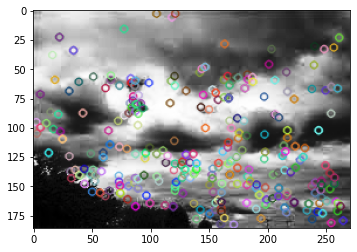

Descripteurs :  (319, 128)

[[ 21.   2.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  21.  13.  12.]
 [  1.   1.   0. ...  13.   1.   3.]
 ...
 [ 46.  22.   0. ...   0.   0.   0.]
 [ 26. 140.   5. ...   1.   0.   0.]
 [ 49.  33.   4. ...  59.   2.   1.]]
